K-평균 군집 분석 이론


- 비지도 학습과 군집 분석

    이전까지 배운 지도 학습은 정답(레이블)이 있는 데이터를 사용해 모델을 훈련했습니다. 

    **비지도 학습(Unsupervised Learning)**은 정답이 없는 데이터의 숨겨진 구조나 패턴을 스스로 찾는 것을 목표로 합니다. 

    그중 **군집 분석(Clustering)**은 데이터를 유사한 특징을 가진 그룹(군집)으로 묶는 비지도 학습의 대표적인 방법입니다.


- K-평균 군집 분석(K-Means Clustering)이란?

    K-평균 군집 분석은 가장 널리 사용되는 군집 분석 알고리즘 중 하나입니다. 

    사용자가 미리 지정한 개수(K)만큼의 그룹으로 데이터를 나누는 것이 핵심입니다. 

    이 알고리즘의 목표는 각 데이터 포인트를 가장 가까운 그룹의 중심(Centroid)에 할당하는 방식으로 군집을 형성하는 것입니다.


- K-평균 알고리즘의 작동 원리

    K-평균 알고리즘은 다음 단계를 반복하며 최적의 군집을 찾습니다.

1. K 값 설정: 사용자가 군집의 개수(K)를 미리 정합니다.

2. 중심점(Centroid) 초기화: 데이터 포인트 중에서 무작위로 K개의 중심점을 선택합니다.

3. 데이터 할당: 모든 데이터 포인트를 K개의 중심점 중 가장 가까운 중심점에 할당합니다.

4. 중심점 업데이트: 각 군집에 속한 데이터 포인트들의 평균 위치로 새로운 중심점을 계산하여 업데이트합니다.

5. 반복: 중심점의 위치가 더 이상 변하지 않을 때까지 3, 4번 단계를 반복합니다.

이 과정을 거치면 데이터는 비슷한 특성을 가진 그룹으로 자연스럽게 묶이게 됩니다. 

방금 실습하신 코드에서 KMeans(n_clusters=4, ...)는 K 값을 4로 설정하여 데이터를 4개의 그룹으로 나누라는 의미였습니다.

생성된 데이터 형태: (300, 2)


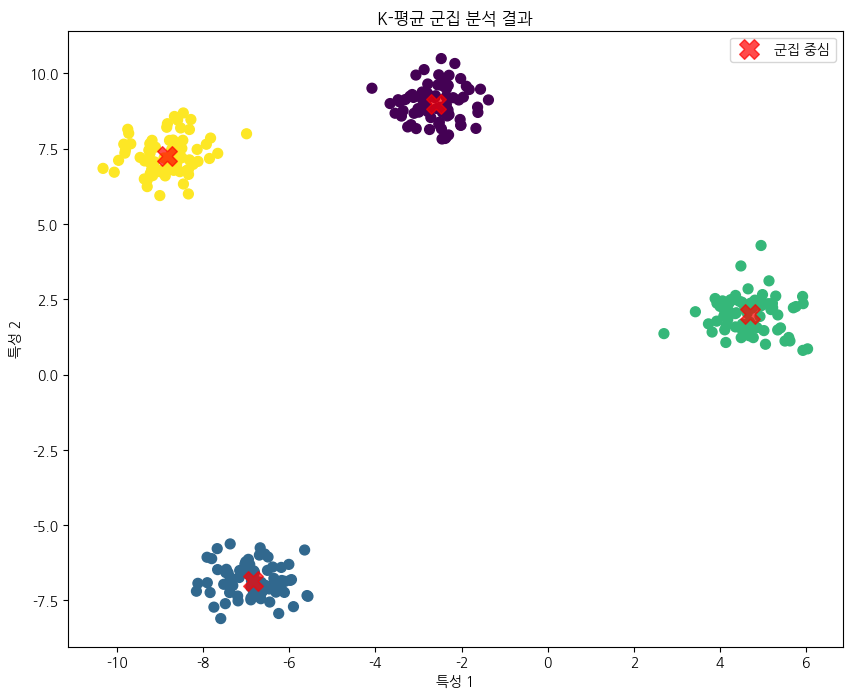

In [6]:
# 파일명: 25_K_평균_군집_분석_실습.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# -----------------------------------------------------------
# 1. 환경 설정 및 라이브러리 설치 안내
# -----------------------------------------------------------
# 이 코드를 실행하기 위해 필요한 패키지를 설치하는 방법입니다.
# 사용하시는 가상 환경 이름은 'mldl_env_250804'를 자동으로 사용합니다.
# 터미널에서 다음 명령어를 실행하여 필요한 라이브러리를 설치하세요.
# python3 -m pip install scikit-learn matplotlib numpy

# -----------------------------------------------------------
# 2. 한글 폰트 설정
# -----------------------------------------------------------
# matplotlib에서 한글을 정상적으로 표시하기 위해 폰트를 설정합니다.
# 'NanumGothic' 폰트가 설치되어 있지 않으면 경고가 발생할 수 있습니다.
# 폰트가 없는 경우, 'NanumGothic'을 설치하거나 다른 한글 폰트 이름을 사용하세요.
try:
    font_path = fm.findfont(fm.FontProperties(family='NanumGothic'))
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
except:
    print("경고: NanumGothic 폰트를 찾을 수 없습니다. 한글을 올바르게 표시하려면 한글 폰트를 설치하세요.")

# -----------------------------------------------------------
# 3. 데이터 준비 (가상의 데이터 생성)
# -----------------------------------------------------------
# make_blobs를 사용해 가상의 데이터셋을 생성합니다.
# n_samples: 생성할 샘플의 수
# n_features: 특성의 수
# centers: 클러스터의 수
# cluster_std: 클러스터의 표준 편차 (클러스터가 얼마나 퍼져있는지)
X, y = make_blobs(n_samples=300, n_features=2, centers=4, cluster_std=0.60, random_state=42)

# 생성된 데이터의 형태를 확인합니다.
print(f"생성된 데이터 형태: {X.shape}")

# -----------------------------------------------------------
# 4. K-평균 군집 모델 훈련
# -----------------------------------------------------------
# KMeans 모델을 정의합니다.
# n_clusters=4는 데이터를 4개의 그룹(군집)으로 나누도록 설정합니다.
# random_state는 매번 동일한 결과를 얻기 위해 설정합니다.
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')

# 훈련 데이터에 모델을 적용하여 군집을 찾습니다.
# 비지도 학습이므로 정답 라벨(y)은 사용하지 않습니다.
kmeans.fit(X)

# 각 데이터 포인트가 속한 군집 라벨을 예측합니다.
y_kmeans = kmeans.predict(X)

# -----------------------------------------------------------
# 5. 군집 결과 시각화
# -----------------------------------------------------------
# 생성된 데이터와 군집 결과를 시각화합니다.
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# 각 군집의 중심(centroid)을 시각화합니다.
# kmeans.cluster_centers_는 각 군집의 중심 좌표를 담고 있습니다.
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='군집 중심')

plt.title("K-평균 군집 분석 결과")
plt.xlabel("특성 1")
plt.ylabel("특성 2")
plt.legend()
plt.show()

# 결과 설명: 데이터가 4개의 색상으로 나뉘고, 각 군집의 중심이 빨간색 X로 표시됩니다.
# K-평균 알고리즘이 정답(y)을 모르고도 데이터를 효과적으로 그룹화했음을 확인할 수 있습니다.
